In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
from IPython.display import display, HTML

В файле Cellphonedata.xlsx содержатся данные о численности населения и количестве мобильных телефонов для 20 стран с наибольшим количеством мобильных телефонов. На основе этих данных выполните задания 1—5.
1. Создайте гистограмму, суммирующую количество телефонов по странам.
2. Создайте точечную диаграмму, отображающую соотношение количества телефонов к численности населения.
3. Настройте срез для фильтрации гистограммы с группировкой для количества мобильных телефонов по странам.
4. Создайте правило фрагментирования для фильтрации гистограммы, суммирующей количество телефонов по странам.
5. Отобразите данные о численности населения на карте.

In [3]:
cellphones = pd.read_excel('~/Study/excel/Ch46/Practice Files/Cellphonedata.xlsx')

In [4]:
cellphones.head()

,Rank,Country,Number of mobile phones,Population
0,1,China,1150000000,1349585838
1,2,India,867800000,1220800359
2,3,United States,327577529,310866000
3,4,Brazil,265741000,192379287
4,5,Russia,256117000,142905200


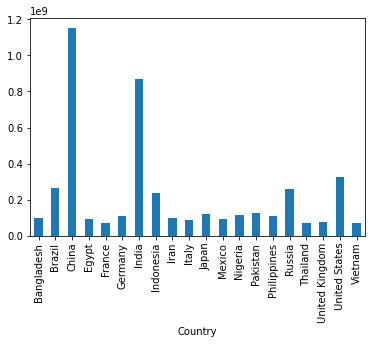

In [20]:
cellphones.groupby('Country')['Number of mobile phones'].sum().plot(kind='bar');

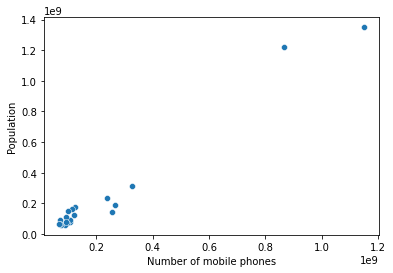

In [25]:
sns.scatterplot(data=cellphones, x='Number of mobile phones', y='Population');

***
На основе данных о филиалах банка создайте спарклайны-графики с одним и тем же масштабом для каждого филиала.

In [73]:
sparklines = pd.read_excel('~/Study/excel/Ch47/Practice Files/sparklines.xlsx',
                          usecols=range(2,9), skiprows=6).rename(columns={'Unnamed: 2': 'City'})

/Users/popov/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [158]:
def sparkline(data, figsize=(2, 0.25), **kwags):

    data = np.array(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    
    
    plt.plot(data.argmin(), data.min(), 'r.')
    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [159]:
sparklines['Summary'] = sparklines.loc[:, 'Monday': 'Friday'].apply(sparkline, axis=1)

In [160]:
HTML(sparklines.to_html(escape=False))

,City,Monday,Tuesday,Wednesday,Thursday,Friday,Summary
0,New York,1176,768,808,864,1235,
1,Rochester,475,323,333,356,515,
2,Utica,360,250,228,275,378,
3,Syracuse,594,412,408,459,618,
4,Buffalo,698,475,504,551,803,
5,Ossining,306,208,204,234,322,
6,Ithaca,437,288,294,299,450,


***
Зафиксируйте взлеты и падения рынка с помощью спарклайнов выигрыша/проигрыша. Как и в предыдущем случае, данные находятся в файле Dow.xlsx.

In [115]:
dow = pd.read_excel('~/Study/excel/Ch47/Practice Files/Dow.xlsx')

In [116]:
dow.head()

,Date,Adj Close
0,2010-01-04,10583.96
1,2010-01-05,10572.02
2,2010-01-06,10573.68
3,2010-01-07,10606.86
4,2010-01-08,10618.19


In [171]:
HTML(dow.assign(Change=dow['Adj Close'].pct_change())
 .style
 .format({'Date': '{:%Y %m}'})
 .bar(subset=['Change'],
      align='mid',
      color=['red', 'green'],
     )
 .set_properties(**{'text-align': 'center'}, subset='Change')
 .render()
)

,Date,Adj Close,Change
0,2010 01,10583.960000,nan
1,2010 01,10572.020000,-0.001128
2,2010 01,10573.680000,0.000157
3,2010 01,10606.860000,0.003138
4,2010 01,10618.190000,0.001068
5,2010 01,10663.990000,0.004313
6,2010 01,10627.260000,-0.003444
7,2010 01,10680.770000,0.005035
8,2010 01,10710.550000,0.002788
9,2010 01,10609.650000,-0.009421


***
В файле Goals.xlsx для каждого месяца содержатся процентные отношения, касающиеся достижения целей филиалами банка. Обработайте эти данные с помощью спарклайнов выигрыша/проигрыша.

In [137]:
goals = pd.read_excel('~/Study/excel/Ch47/Practice Files/Goals.xlsx',
                          usecols=range(3,16), skiprows=6)

In [138]:
goals

,Branch,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,New York,-0.11,-0.03,-0.12,0.32,0.33,0.57,0.03,0.07,0.47,0.01,0.11,0.70
1,Rochester,-0.27,-0.39,-0.37,-0.42,-0.38,-0.34,0.08,0.12,0.17,0.31,0.19,0.29
2,Utica,-0.37,-0.26,-0.37,-0.57,-0.30,-0.55,-0.24,-0.42,-0.30,-0.39,-0.21,-0.28
3,Syracuse,0.43,0.37,0.14,0.12,0.28,0.33,0.37,0.31,0.26,0.13,0.10,0.48


In [168]:
def bar_sparkline(data, figsize=(2, 0.25), **kwags):

    data = np.array(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    
    colors = np.where(data < 0, 'red', 'blue')
    plt.bar(range(len(data)), data, width=1, color=colors)
    
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [169]:
HTML(goals.assign(Summary=goals.loc[:, 'Jan': 'Dec']
                  .apply(bar_sparkline, axis=1))
                  .to_html(escape=False))

,Branch,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summary
0,New York,-0.11,-0.03,-0.12,0.32,0.33,0.57,0.03,0.07,0.47,0.01,0.11,0.70,
1,Rochester,-0.27,-0.39,-0.37,-0.42,-0.38,-0.34,0.08,0.12,0.17,0.31,0.19,0.29,
2,Utica,-0.37,-0.26,-0.37,-0.57,-0.30,-0.55,-0.24,-0.42,-0.30,-0.39,-0.21,-0.28,
3,Syracuse,0.43,0.37,0.14,0.12,0.28,0.33,0.37,0.31,0.26,0.13,0.10,0.48,


***
Эти задания относятся к данным в файлах Jancon.xlsx и Febcon.xlsx. Каждый файл содержит проданный продукт, показатели продаж в штуках и выручку в долларах для сделок за месяц.
1. Создайте объединенный лист, на котором определен общий показатель продаж в штуках и общая выручка в долларах для каждого продукта по регионам.
2. Создайте объединенный лист, на котором за первый квартал по регионам для каждого продукта определяется самая крупная сделка с точки зрения выручки и количества проданных единиц продукции.

In [175]:
jancon = pd.read_excel('~/Study/excel/Ch50/Practice Files/Jancon.xlsx',
                          usecols=range(1,7), skiprows=5)
febcon = pd.read_excel('~/Study/excel/Ch50/Practice Files/Febcon.xlsx',
                          usecols=range(1,7), skiprows=5)

In [174]:
jancon.head()

,Product,East revenue,East units sold,West revenue,West units sold
0,A,188,47,136,34
1,B,40,10,22,11
2,C,184,46,66,33
3,B,45,15,156,39
4,B,36,18,138,46


In [176]:
febcon.head()

,Product,East revenue,East units sold,West revenue,West units sold
0,B,295,59,295,59
1,C,305,61,305,61
2,A,164,41,164,41
3,B,285,57,285,57
4,B,220,55,220,55


In [179]:
pd.concat([jancon, febcon]).groupby('Product')[['East revenue', 'East units sold']].sum()

,East revenue,East units sold
Product,,
A,1071,305
B,1429,366
C,1346,349


In [180]:
pd.concat([jancon, febcon]).groupby('Product').max()

,East revenue,East units sold,West revenue,West units sold
Product,,,,
A,220,59,220,59
B,295,59,295,59
C,305,61,305,61


***
В файле Cakes.xlsx содержится количество продавцов и выручка пекарни за каждый месяц. На основе этих данных выполните задания 1—2.
1. Создайте комбинированную диаграмму со вспомогательной осью для количества продавцов и выручки за каждый месяц.
2. Постройте диаграмму ежемесячной выручки и вставьте в диаграмму подписи данных.

In [186]:
cakes = pd.read_excel('~/Study/excel/Ch52/Practice Files/Cakes.xlsx',
                          usecols=range(2,5), skiprows=4)

In [187]:
cakes

,Month,Salespeople,Revenue
0,January,25,2735900
1,february,21,2210271
2,March,28,3004596
3,April,22,2825548
4,May,28,3576132
5,June,25,3128575
6,July,34,3874198
7,August,24,2665368
8,September,28,2833012
9,October,23,2424844


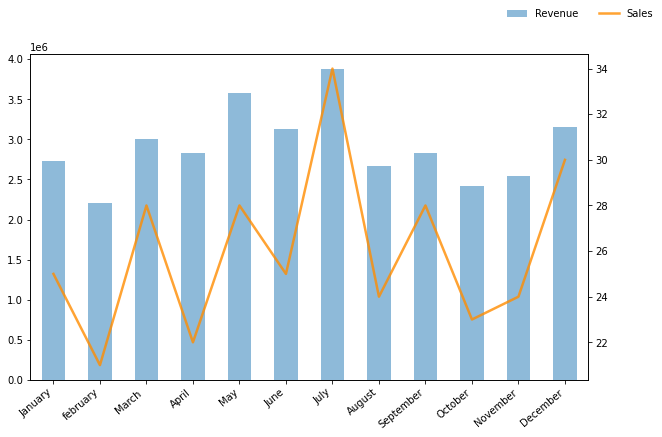

In [270]:
_, ax = plt.subplots(figsize=(10,6))

cakes['Revenue'].plot(kind='bar', ax=ax, alpha=.5)
cakes['Salespeople'].plot(ax=ax, secondary_y=True, color='darkorange', linewidth=2.5, label='Sales', alpha=.8)

ax.set_xticklabels(cakes.Month, rotation=40, ha='right')

plt.figlegend(ncol=2, frameon=False)
plt.show()

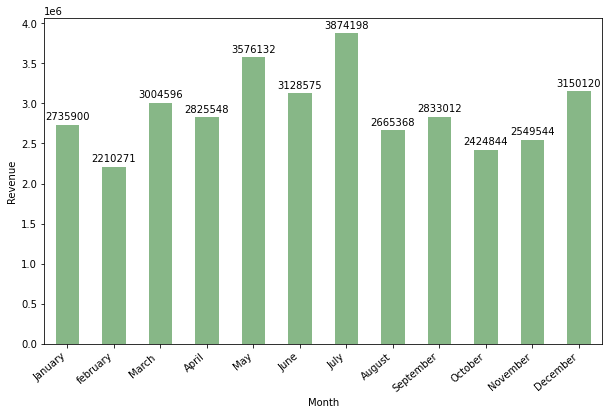

In [284]:
_, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='Month', y='Revenue', data=cakes, color='g', alpha=.5)
  
# annotate
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')
# set bar width
width = 0.5    
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - width
        
    patch.set_width(width)
    patch.set_x(patch.get_x() + diff * .5)

ax.set_xticklabels(cakes.Month, rotation=40, ha='right')
plt.show()

***
В табице содержатся отчеты о работе пяти сотрудников. Представьте эти данные на лепестковой диаграмме.

| Сотрудник | Трудолюбие | Работа в команде | Выполнение заданий в срок | Пунктуальность |
| --- | --- | --- | --- | --- |
| Уэйн | 1 | 2 | 3 | 4 |
| Вивиан | 5 | 6 | 7 | 8 |
| Грег | 10 | 9.5 | 9 | 8.5 |
| Джен | 9 | 2 | 9 | 4 |
| Ванда | 1 | 1.5 | 2 | 2.5 |

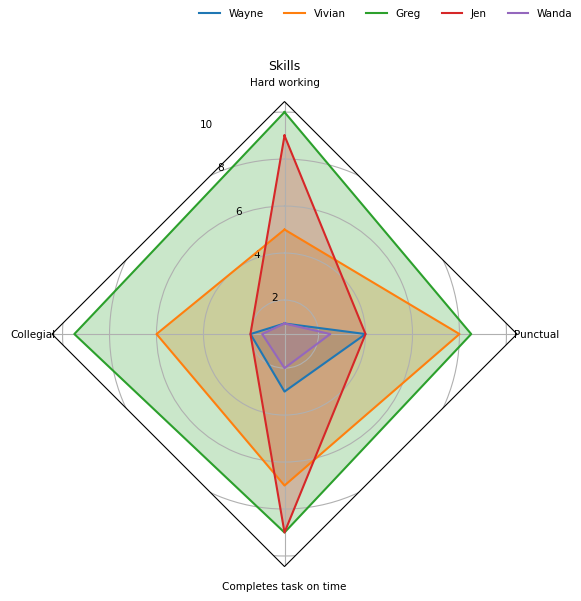

In [487]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

data = [['Hard working', 'Collegial', 'Completes task on time', 'Punctual'],
        ('Skills', [
            [1, 2, 3, 4],
            [5, 6, 7, 8],
            [10, 9.5, 9, 8.5],
            [9, 2, 9, 4],
            [1, 1.5, 2, 2.5]]),
        ['Wayne', 'Vivian', 'Greg', 'Jen', 'Wanda']
       ]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([2, 4, 6, 8, 10])
ax.set_title(title, position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d, alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.figlegend(data[1], ncol=len(data[1]), frameon=False)
plt.show()

***
Проект состоит из пяти задач. Задано время начала и продолжи- тельность выполнения каждой задачи. Представьте эти данные на диаграмме Ганта.

| Задача | Время начала | Продолжительность |
| --- | --- | --- |
| A | 0 | 4 |
| B | 3	| 6 |
| C | 5	| 7 |
| D | 6 | 8 |
| E | 3	| 6 |

In [328]:
tasks = pd.DataFrame({'Task': ['A', 'B', 'C', 'D', 'E'],
                      'Start' : [0, 3, 5, 6, 3],
                      'Duration': [4, 6, 7, 8, 6],
                      'Resource': ['In', 'Out', 'Out', 'Out', 'In']
                     })

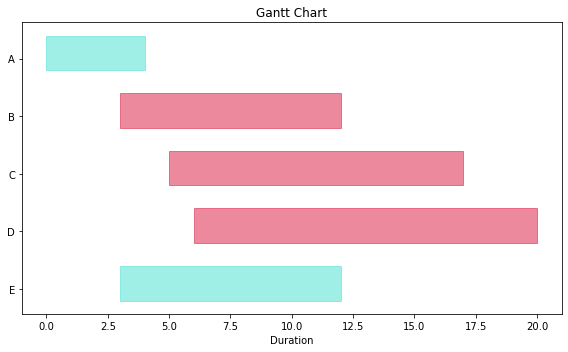

In [349]:
color = {'In': 'turquoise', 'Out': 'crimson'}
fig, ax = plt.subplots(figsize=(8,5))

labels = []
for i, task in enumerate(tasks.assign(Bar = tasks.Start + tasks.Duration).groupby('Task')):
    labels.append(task[0])
    for r in task[1].groupby('Resource'):
        data = r[1][['Start', 'Bar']]
        ax.broken_barh(data.values, (i-0.4,0.6), color=color[r[0]], alpha=.5)

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels) 
ax.set_xlabel('Duration')
plt.title('Gantt Chart')
plt.gca().invert_yaxis()
plt.tight_layout()       
plt.show()

***
В таблице приведена прибыль, а также доходы и расходы в разбивке по годам. Представьте эти данные на диаграмме "водопад".


| Статья | Сумма, $ |
| --- | --- |
| Доходы | 300000 |
| Прибыль | 65000 |
| Трудозатраты | 100000	|
| Затраты на материал | 80000 |
| Накладные расходы | 55000	|

[Creating a waterfall chart using Bokeh](!https://github.com/chris1610/pbpython/blob/master/notebooks/Bokeh-Waterfall.ipynb)

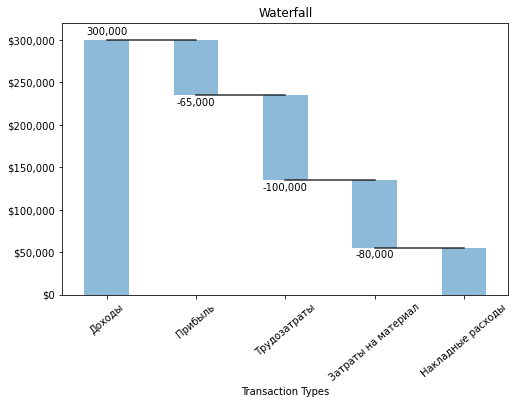

In [350]:
from matplotlib.ticker import FuncFormatter

def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
formatter = FuncFormatter(money)

index = ['Доходы', 'Прибыль', 'Трудозатраты', 'Затраты на материал', 'Накладные расходы']
data = {'amount': [300000, -65000, -100000, -80000, -55000]}

#Store data and create a blank series to use for the waterfall
trans = pd.DataFrame(data=data, index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
#trans.loc["net"]= total
#blank.loc["net"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

#When plotting the last element, we want to show the full bar,
#Set the blank to 0

#blank.loc["net"] = 0

#Plot and label
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank, 
                     legend=None, figsize=(8,5), alpha=.5, title="Waterfall")
my_plot.plot(step.index, step.values, 'k', alpha=.8)
my_plot.set_xlabel("Transaction Types")

#Format the axis for dollars
my_plot.yaxis.set_major_formatter(formatter)

#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']), (loop,y), ha="center")
    loop += 1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0, blank.max() + int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index, rotation=40);

In [352]:
index = ['Доходы', 'Прибыль', 'Трудозатраты', 'Затраты на материал', 'Накладные расходы']
data = {'amount': [300000, -65000, -100000, -80000, -55000]}

trans = pd.DataFrame(data=data, index=index)

In [353]:
trans

,amount
Доходы,300000
Прибыль,-65000
Трудозатраты,-100000
Затраты на материал,-80000
Накладные расходы,-55000


In [411]:
import waterfall_chart
plt.rcParams.update({'figure.figsize': (8,5), 'font.size': 7.5})

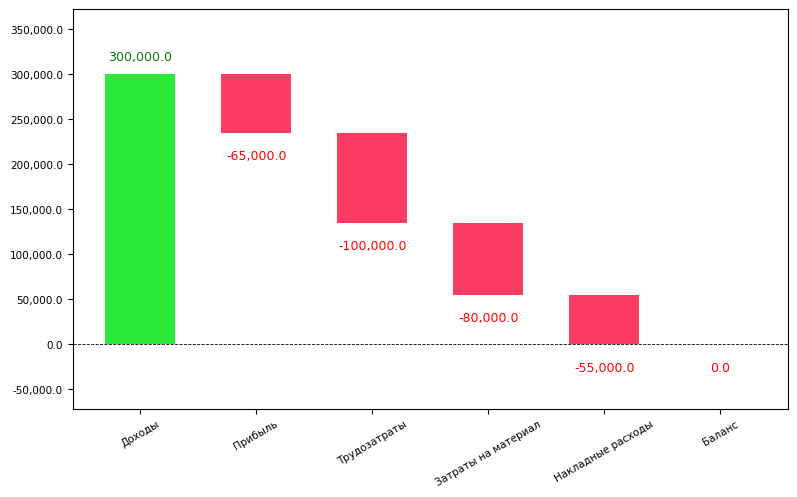

In [460]:
waterfall_chart.plot(trans.index, trans.amount, net_label='Баланс');

***
В файле Paretodata.xlsx находятся данные о продажах продукции в хозяйственном магазине. Создайте диаграмму Парето для выручки по продуктам. Соответствуют ли эти данные правилу 80/20?

In [365]:
pareto = pd.read_excel('~/Study/excel/Ch52/Practice Files/Paretodata.xlsx',
                          usecols=range(24,28), skiprows=6)

In [372]:
pareto.columns = pareto.columns.str.replace(r'\.\d', '', regex=True)

In [373]:
pareto.head()

,Product,Month,Store,Revenue
0,Tape 10,April,downtown,2.5
1,Safety 8,August,uptown,10.0
2,Safety 2,February,uptown,10.0
3,Safety 8,November,uptown,10.0
4,Tape 10,October,uptown,2.5


In [658]:
import matplotlib.ticker as mticker

def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(8,5))
    ax1.bar(x, y, alpha=0.5)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ticks_loc = ax1.get_xticks()
    ax1.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax1.set_xticklabels(ticks_loc, rotation=60)
    
    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    ax2.axvline(np.argwhere(cumsum >= 0.8)[0][0], color='yellow', linestyle='--', alpha=.5)
    
    vals = ax2.get_yticks()
    ax2.yaxis.set_major_locator(mticker.FixedLocator(vals))
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), xytext=(2,8), fontsize=6, ha='center', textcoords='offset points')    
    
    if title:
        plt.title(title)

    #ax1.set_ylim([0, y.max() * 1.04])
    plt.ylim(top=1.5)
    plt.tight_layout()
    plt.show()

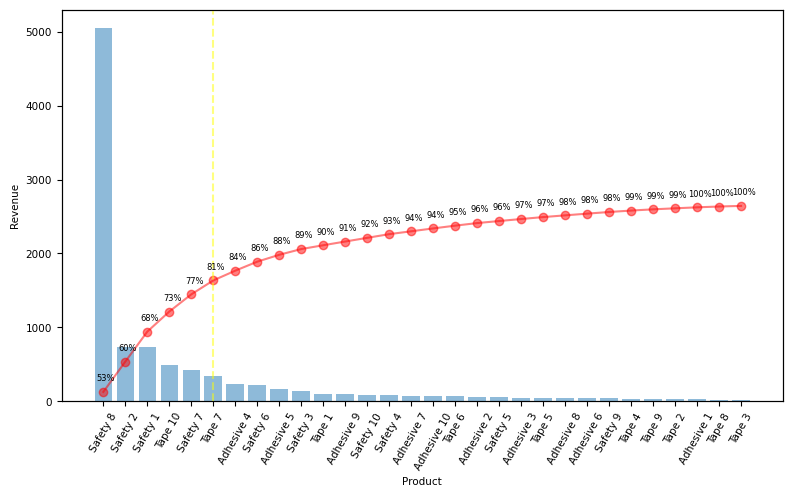

In [659]:
pareto_plot(pareto.groupby('Product')['Revenue'].sum().reset_index(), x='Product', y='Revenue');

Файл Delldata.xlsx содержит ежемесячные доходы для фондового индекса Standard&Poor и акции Dell. Бета-коэффициент акции определяется как угловой коэффициент линии наименьших квадратов, используемой для прогнозирования ежемесячного дохода от акции по ежемесячному доходу от всех операций на рынке.
1. Оцените бета-коэффициент акции Dell.
2. Интерпретируйте смысл бета-коэффициента акции Dell.
3. Если считать, что наступает рецессия, в какие акции следует инвестировать, с высоким или низким бета-коэффициентом?
4. Для месяца, в котором рынок растет на 5%, определите диапазон, в котором цена акции Dell возрастет с вероятностью 95%.

In [504]:
dell = pd.read_excel('~/Study/excel/Ch53/Practice Files/Delldata.xlsx',
                          usecols=range(1,4), skiprows=2)

In [505]:
dell.head()

,Date,S and P return,Dell return
0,1988-09-01,0.042,0.282113
1,1988-10-01,0.027,0.158240
2,1988-11-01,-0.014,-0.084074
3,1988-12-01,0.018,-0.080318
4,1989-01-01,0.072,-0.049904


In [137]:
import scipy.stats as stats

In [507]:
slope, intercept = np.polyfit(dell['S and P return'], dell['Dell return'], 1)

Каждый 1% прирост рынка увеличивает цену акций Dell на 1,76%.

Если надвигается рецессия — рынок упадет, поэтому нужен низкий `slope`, который будет менее чувствительным к изменениям на рынке.

In [562]:
# stats.linregress(dell['S and P return'], dell['Dell return'])

Ручной расчет стандартной ошибки

In [544]:
N = len(dell)
X_with_intercept = np.c_[np.ones(shape=(N, 1), dtype=np.float), dell['S and P return'].values]

In [553]:
residuals = (dell['Dell return'] - (intercept + dell['S and P return'] * slope)).values
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares / (N - 2)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
for p_ in range(2):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")

SE(beta_hat[0]): 0.013441754349923339
SE(beta_hat[1]): 0.3244481595695797


Диапазон, в котором цена акции Dell возрастет с вероятностью 95%, если рынок вырастет на 5%.

In [554]:
forecast = slope * 5 + intercept
lower = forecast - 2 * standard_error # нижняя граница диапазона
upper = forecast + 2 * standard_error # верхняя граница

lower, upper

(8.198647693767338, 9.496440332045658)

***
В файле Housedata.xlsx приведены данные о площади в квадратных футах и продажной цене нескольких домов в Белвью, штат Вашингтон.

In [2]:
house = pd.read_excel('~/Study/excel/Ch53/Practice Files/Housedata.xlsx',
                          usecols=range(2,4), skiprows=2)

In [3]:
house

,Square Footage,Value
0,2000,238139.369515
1,2200,259711.950793
2,2400,300953.668043
3,3000,369965.731273
4,3200,340091.295488
5,3600,405425.020969
6,2900,345131.033126


Вы собираетесь возвести пристройку площадью 500 кв. футов к дому. Насколько в результате возрастет цена дома?

In [4]:
slope, intercept = np.polyfit(house['Square Footage'], house['Value'], 1)

In [5]:
slope * 500

49819.88481354167

Какой процент изменения цены дома можно объяснить изменением его размера?

In [6]:
from sklearn.metrics import r2_score

In [7]:
reg = lambda x: slope * x + intercept
r2_score(house['Value'], reg(house['Square Footage'])) # показывает что линейная зависимость объясняет 92% данных

0.9233422397917884

Дом площадью 3000 кв. футов продается за 500 000 долларов. Соответствует ли такая цена типичной цене на недвижимость в Белвью? Чем вызвано такое несоответствие

In [12]:
forecast = reg(3000) # предсказание цены
*_, stderr = stats.linregress(house['Square Footage'], house['Value'])

In [22]:
forecast

346972.23965332384

In [25]:
(500000 - forecast) / stderr

11918.61519601473

***
Известно, что температура 32° по Фаренгейту эквивалента температуре 0° по Цельсию и что температура 212° по Фаренгейту эквивалентна температуре 100° по Цельсию. С помощью кривой тренда определите зависимость между градусами Фаренгейта и Цельсия.

In [34]:
degrees = pd.DataFrame({'C': [0, 100], 'F': [32, 212]})
degrees

,C,F
0,0,32
1,100,212


In [36]:
slope, intercept = np.polyfit(degrees['C'], degrees['F'], 1)
slope, intercept

(1.7999999999999994, 31.999999999999996)

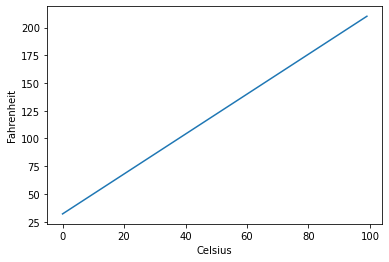

In [42]:
plt.plot(np.arange(0, 100, 1) * slope + intercept)
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit');

***
Файл Betadata.xlsx содержит ежемесячный доход для индекса Standard&Poor, а также ежемесячные доходы для акций Cinergy, Dell, Intel, Microsoft, Nortel и Pfizer. Вычислите коэффициент бета каждой акции.

In [47]:
beta = pd.read_excel('~/Study/excel/Ch53/Practice Files/Betadata.xlsx',
                          usecols=range(2,10), skiprows=5)

In [48]:
beta.head()

,Cin,Dell,INTC,MSFT,NT,PFE,S and P
0,0.009470,0.282113,-0.017829,0.045075,0.058011,0.071411,0.042
1,0.034973,0.158240,-0.100070,-0.062147,-0.027437,0.050589,0.027
2,-0.037033,-0.084074,-0.191880,-0.035851,-0.063339,0.002503,-0.014
3,0.009611,-0.080318,0.187520,0.127095,0.000000,0.022035,0.018
4,0.012383,-0.049904,0.094718,0.119659,-0.060189,0.003346,0.072


In [59]:
beta.loc[:, 'Cin':'PFE'].apply(lambda x: np.polyfit(x, beta['S and P'], 1), axis=0).loc[0]

Cin     0.079729
Dell    0.096543
INTC    0.158030
MSFT    0.190308
NT      0.168972
PFE     0.253789
Name: 0, dtype: float64

В файле Oldfaithful.xlsx хранятся данные о времени между извержениями гейзера Олд-Фейтфул и продолжительность следующего извержения. Предположим, что прошло 4 минуты после последнего извержения. С вероятностью 95% можно утверждать, что продолжительность следующего извержения составит от ______ до ______.

In [60]:
oldfaithful = pd.read_excel('~/Study/excel/Ch53/Practice Files/Oldfaithful.xlsx',
                          usecols=range(6,9), skiprows=16)

In [61]:
oldfaithful

,Minutes between eruptions,Duration of eruption
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


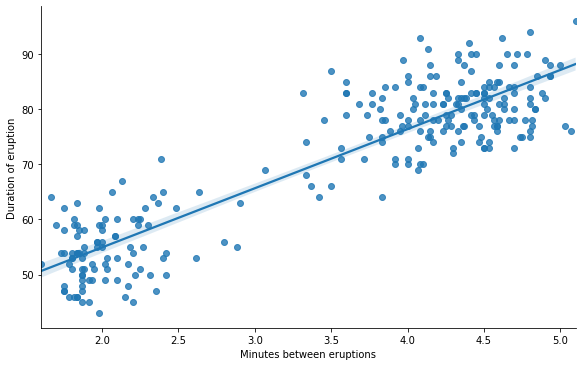

In [136]:
sns.lmplot(data=oldfaithful, x='Minutes between eruptions', y='Duration of eruption', height=5, aspect=1.6);

In [64]:
slope, intercept, _, _, stderr = stats.linregress(oldfaithful['Minutes between eruptions'],
                                                  oldfaithful['Duration of eruption'])

In [66]:
prediction = slope * 4 + intercept
prediction

76.39296260328746

In [67]:
# 95% sure
lower = prediction - 2 * stderr
upper = prediction + 2 * stderr
lower, upper

(75.76345579159464, 77.02246941498028)

С вероятностью 95% можно утверждать, что продолжительность следующего извержения составит от 75.76 до 77.02

***
В файле Dailydow.xlsx приведены ежедневные значения индекса Доу—Джонса с 1996 по 2010 гг. Каково значение $R^2$ для завтрашнего значения индекса Доу—Джонса, прогнозируемого по сегодняшнему значению? Означает ли такое высокое значение $R^2$, что движение рынка предсказать нетрудно?

In [78]:
dow = pd.read_excel('~/Study/excel/Ch53/Practice Files/Dailydow.xlsx',
                          usecols=range(2), skiprows=7).dropna()

In [80]:
dow.head()

,Date,Dow
0,1996-01-02,5177.45
1,1996-01-03,5194.07
2,1996-01-04,5173.84
3,1996-01-05,5181.43
4,1996-01-08,5197.70


In [94]:
tt = pd.DataFrame({'Today': dow.Dow[:-1].values, 'Tomorrow': dow.Dow[1:].values})
tt.head()

,Today,Tomorrow
0,5177.45,5194.07
1,5194.07,5173.84
2,5173.84,5181.43
3,5181.43,5197.70
4,5197.70,5130.13


In [ ]:
# correlation_matrix = np.corrcoef(tt.Today, tt.Tomorrow)
# correlation_xy = correlation_matrix[0,1]
# r_squared = correlation_xy ** 2

In [108]:
tt.corr().iloc[0, 1] ** 2

0.9959863690790146

$R^2 = 0.995$ означает, что завтрашний индекс Доу близок к сегодняшнему.

***
Файл Exponentialdata.xlsx содержит годовой доход от продаж для компаний Staples, Walmart и Intel. На основе этих данных выполните первые пять заданий:
1. Для каждой компании подберите экспоненциальную кривую тренда к данным продаж.
2. Для какой компании экспоненциальный рост наиболее соответствует росту дохода?
3. Для какой компании экспоненциальный рост менее всего соответствует росту дохода?

In [138]:
import scipy

In [140]:
expo = pd.read_excel('~/Study/excel/Ch54/Practice Files/Exponentialdata.xlsx',
                          usecols=range(1, 5), skiprows=2)

In [141]:
expo

,Year,Staples,Wal-Mart,Intel
0,2001,10874,191329,33726
1,2000,8842,185013,29389
2,1999,7123,157634,28273
3,1998,5181,117958,25070
4,1997,3968,104859,20847


In [176]:
x = [*range(len(expo), 0, -1)]
# y = expo['Staples'].values

In [182]:
ab = expo.loc[:, 'Staples': 'Intel'] \
                .apply(lambda y: scipy.optimize.curve_fit(lambda t, a, b: a * np.exp(b * t), x, y)[0])

$y = ae^{bx}$

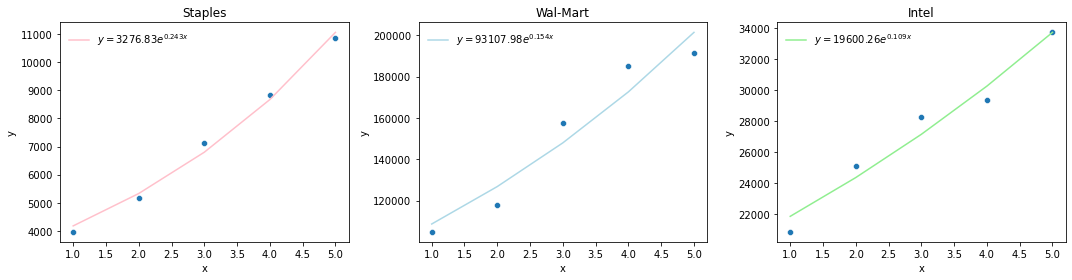

In [224]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
colors = iter(('pink', 'lightblue', 'lightgreen'))
for i, stock in enumerate(ab.columns):
    a, b = ab[stock].values
    sns.scatterplot(data=pd.DataFrame({'x': x, 'y': expo[stock]}), x='x', y='y', ax=ax[i])
    ax[i].plot(x, a * np.exp(b * np.array(x)), color=next(colors),
                                      label="$y = %s e^{%sx}$" % (round(a,2), round(b,3)))
    ax[i].set_title(f'{stock}')
    ax[i].legend(frameon=False)

plt.tight_layout()
plt.show()

Лучше всего кривая экспоненциального роста описывает данные Staples.
Экспоненциальный рост менее всего соответствует росту дохода Wal-Mart, так как у нее самый низкий $R^2$

4. Для каждой компании вычислите годовые темпы роста дохода в процентах.

In [254]:
for stock in ab.columns:
    a, b = ab[stock].values
    data = [a * np.exp(b * x) for x in range(5, 7)]
    print(f'{stock} is growing at {100 * ((data[1] / data[0]) - 1):.2f}%') 

Staples is growing at 27.54%
Wal-Mart is growing at 16.69%
Intel is growing at 11.47%


5. Для каждой компании спрогнозируйте по кривой тренда доход в 2003 г.

In [253]:
for stock in ab.columns:
    a, b = ab[stock].values
    year_2003 = a * np.exp(b * 7) # 2003 == 7
    print(f'{stock} forecast is {year_2003:.4f} billions of dollars') 

Staples forecast is 17985.5957 billions of dollars
Wal-Mart forecast is 274313.2514 billions of dollars
Intel forecast is 41902.7549 billions of dollars


***
В файле Impalas.xlxs приведены цены Impalas 2009, 2008, 2007 и 2006 на 2010 гг. Исходя из этих данных, оцените снижение стоимости автомобиля по мере его старения?

In [255]:
impala = pd.read_excel('~/Study/excel/Ch54/Practice Files/Impalas.xlsx',
                          usecols=range(3), skiprows=2)

In [256]:
impala

,Model year,Age,Price
0,2009,1,13.650
1,2008,2,11.200
2,2007,3,9.725
3,2006,4,8.475


In [264]:
x = impala['Age']
y = impala['Price']
a, b = scipy.optimize.curve_fit(lambda t, a, b: a * np.exp(b * t), x, y)[0]

In [271]:
forecasts = impala['Age'].apply(lambda x: a * np.exp(b * x))

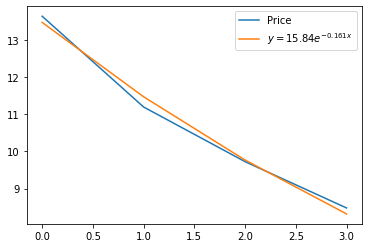

In [280]:
impala['Price'].plot(label='Price')
forecasts.plot(label="$y = %s e^{%sx}$" % (round(a,2), round(b,3)))
plt.legend();

In [288]:
print(f'Мы видим, что каждый год Импала теряет {100 * (1 - np.exp(b)):.2f}% от её стоимости')

Мы видим, что каждый год Импала теряет 14.88% от её стоимости


***
На основе данных о факсах смоделируйте зависимость между совокупным количеством произведенных факсов и общей себестоимостью произведенной продукции.

In [301]:
fax = pd.read_excel('~/Study/excel/Ch55/Practice Files/Fax.xlsx',
                          usecols=range(5), skiprows=2, nrows=7)

/Users/popov/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [308]:
fax

,Year,Production,Cumulative Production,Unit Cost,Forecast
0,1982,64000,64000,3700,3955.806385
1,1983,70000,134000,3416,3280.535707
2,1984,100000,234000,3125,2848.511898
3,1985,150000,384000,2583,2512.634482
4,1986,175000,559000,2166,2284.656978
5,1987,400000,959000,1833,1992.717622
6,1988,785000,1744000,1788,1712.602963


In [356]:
func = lambda t, a, b: a * t ** b
x = fax['Cumulative Production']
y = fax['Unit Cost']
a, b = scipy.optimize.curve_fit(func, x, y)[0]

In [357]:
forecasts = fax['Cumulative Production'].apply(lambda x: func(x, a, b))

**Оценка кривой обучения**

In [358]:
double_cp = (fax['Cumulative Production'].tail(1) * 2).iloc[0] # double cumulative production
func(double_cp, a, b) / forecasts.tail(1) # learning percentage

6    0.846469
Name: Cumulative Production, dtype: float64

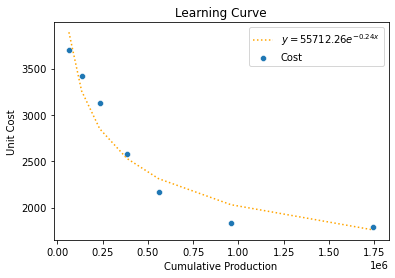

In [359]:
sns.scatterplot(data=fax, x='Cumulative Production', y='Unit Cost', label='Cost')
plt.plot(fax['Cumulative Production'], forecasts,
         label="$y = %s e^{%sx}$" % (round(a,2), round(b,3)), color='orange', linestyle='dotted')
plt.title('Learning Curve')
plt.legend();

На основе данных о факсах смоделируйте зависимость между совокупным количеством произведенных факсов и средней себестоимостью одного факса.

In [369]:
cum_cost = pd.DataFrame({'unit': (units:=list(range(1, 21))),
                         'cost': (cost:=[func(x, a, b) for x in units]),
                         'cum cost': (cum:=np.cumsum(cost)),
                         'avg cost': [x / y for x, y in zip(cost, units)]
             })
cum_cost.head()

,unit,cost,cum cost,avg cost
0,1,60931.998716,60931.998716,60931.998716
1,2,53333.887558,114265.886274,26666.943779
2,3,49336.431386,163602.317660,16445.477129
3,4,46683.247260,210285.564919,11670.811815
4,5,44723.937699,255009.502619,8944.787540


In [361]:
x = cum_cost['unit']
y = cum_cost['cum cost']
a, b = scipy.optimize.curve_fit(func, x, y)[0]
a, b

(60931.99871607247, 0.8078524262833358)

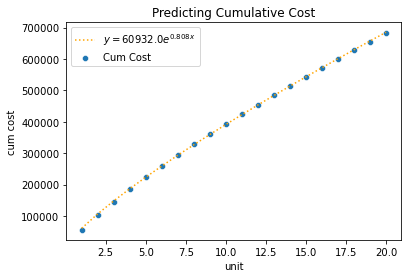

In [362]:
forecasts = cum_cost['unit'].apply(lambda x: func(x, a, b)) # Cost of making x units = 60931*(x)^0.8

sns.scatterplot(data=cum_cost, x='unit', y='cum cost', label='Cum Cost')
plt.plot(cum_cost['unit'], forecasts,
         label="$y = %s e^{%sx}$" % (round(a,2), round(b,3)), color='orange', linestyle='dotted')
plt.title('Predicting Cumulative Cost')
plt.legend();

In [364]:
x = cum_cost['unit']
y = cum_cost['avg cost']
a, b = scipy.optimize.curve_fit(func, x, y)[0]
a, b

(60931.99871607246, -0.19214757371666422)

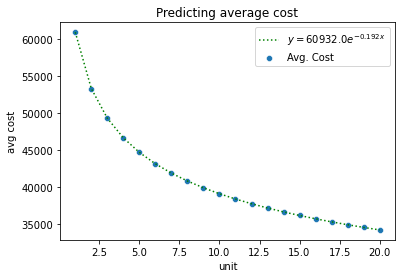

In [366]:
forecasts = cum_cost['unit'].apply(lambda x: func(x, a, b)) # Average cost of first x units = 60932x^-.19

sns.scatterplot(data=cum_cost, x='unit', y='avg cost', label='Avg. Cost')
plt.plot(cum_cost['unit'], forecasts,
         label="$y = %s e^{%sx}$" % (round(a,2), round(b,3)), color='green', linestyle='dotted')
plt.title('Predicting average cost')
plt.legend();

Коммерческий директор считает, что общий объем продаж продукта зависит от цены так, как показано в таблице. Определите зависимость между ценой и спросом, а также прогнозируемым спросом для цены 46 долларов. На какое количество процентов уменьшается спрос при увеличении цены на 1%?

| Цена, $ | Спрос |
| --- | --- |
| 30.00 | 300 |
| 40.00 | 200 |
| 50.00 | 110 |
| 60.00 | 60 |

In [372]:
sales = pd.DataFrame({'price': [30, 40, 50, 60],
                      'demand': [300, 200, 110, 60]
                     })

In [373]:
sales

,price,demand
0,30,300
1,40,200
2,50,110
3,60,60


In [376]:
x = sales['price']
y = sales['demand']
a, b = scipy.optimize.curve_fit(func, x, y)[0]
a, b

(240249.77071248475, -1.958023901481229)

In [381]:
func(46, a, b)

133.33476660711432

При цене 46 $, мы прогнозируем спрос 133.33 шт. Повышение цены на 1% снижает спрос

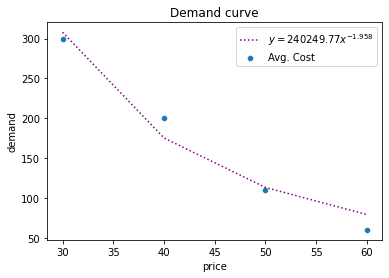

In [383]:
forecasts = sales['price'].apply(lambda x: func(x, a, b)) # Demand = 240249x^-1.96

sns.scatterplot(data=sales, x='price', y='demand', label='Avg. Cost')
plt.plot(sales['price'], forecasts,
         label="$y = %s x^{%s}$" % (round(a,2), round(b,3)), color='purple', linestyle='dotted')
plt.title('Demand curve')
plt.legend();

Бренд-менеджер нового лекарственного препарата считает, что годовой объем продаж препарата является функцией количества коммерческих предложений, сделанных врачам по телефону. Определите объем продаж препарата, если врачам сделано 80 000 коммерческих звонков.

| Коммерческие звонки| Количество проданного препарата |
| --- | --- |
| 50 000 | 25 000 |
| 100 000 | 52 000 |
| 150 000 | 68 000 |
| 200 000 | 77 000 |

In [385]:
sales = pd.DataFrame({'Sales call': [50000, 100000, 150000, 200000],
                      'Units sold': [25000, 52000, 68000, 77000]
                     })
sales

,Sales call,Units sold
0,50000,25000
1,100000,52000
2,150000,68000
3,200000,77000


In [386]:
x = sales['Sales call']
y = sales['Units sold']
a, b = scipy.optimize.curve_fit(func, x, y)[0]
a, b

(11.610487056219641, 0.7240785856638703)

In [387]:
func(80000, a, b)

41216.670066304454

Если будет сделано 80000 звонков, мы предсказываем продажу 41217 единиц.

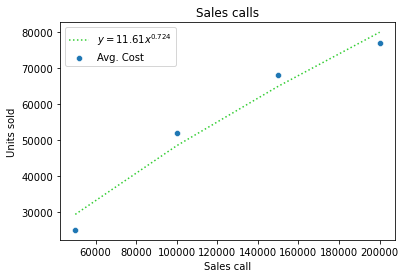

In [389]:
forecasts = sales['Sales call'].apply(lambda x: func(x, a, b)) #  Volume of sales = 11.61x^.72

sns.scatterplot(data=sales, x='Sales call', y='Units sold', label='Avg. Cost')
plt.plot(sales['Sales call'], forecasts,
         label="$y = %s x^{%s}$" % (round(a,2), round(b,3)), color='limegreen', linestyle='dotted')
plt.title('Sales calls')
plt.legend();

Время, необходимое для производства каждого из первых десяти самолетов, приведено в таблице.

| Самолет| Часы |
| --- | --- |
| 1 | 1000 |
| 2 | 800 |
| 3 | 730 |
| 4 | 630 |
| 5 | 600 |
| 6 | 560 |
| 7 | 560 |
| 8 | 500 |
| 9 | 510 |
| 10 | 450 |

Определите общее количество часов, необходимое для производства следующих десяти самолетов.

In [408]:
aero = pd.DataFrame({'unit': [*range(1, 11)],
                     'hours': [1000, 800, 730, 630, 600, 560, 560, 500, 510, 450]
       })
aero

,unit,hours
0,1,1000
1,2,800
2,3,730
3,4,630
4,5,600
5,6,560
6,7,560
7,8,500
8,9,510
9,10,450


In [409]:
x = aero['unit']
y = aero['hours']
a, b = scipy.optimize.curve_fit(func, x, y)[0]
a, b

/Users/popov/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(999.9999987172243, -59.12843190165848)

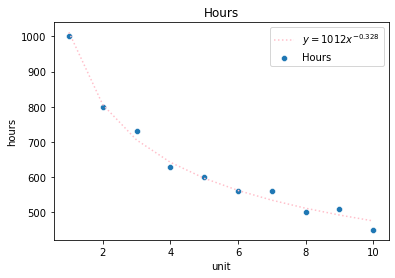

In [415]:
a, b = 1012, -0.328
forecasts = aero['unit'].apply(lambda x: func(x, a, b)) #  Estimated hours = 1012x^-.328

sns.scatterplot(data=aero, x='unit', y='hours', label='Hours')
plt.plot(aero['unit'], forecasts,
         label="$y = %s x^{%s}$" % (round(a,2), round(b,3)), color='pink', linestyle='dotted')
plt.title('Hours')
plt.legend();

In [433]:
print(f'hours for units 1-10: {aero["hours"].sum()}')
print(f'esitmated hours for units 11-20: {sum(func(x, a, b) for x in range(11, 21)):.0f}')

hours for units 1-10: 6340
esitmated hours for units 11-20: 4151
